<h1>Cleaning US Census Data</h1>

Exercise from [codeacademy](https://www.codecademy.com/courses/practical-data-cleaning/projects/data-cleaning-us-census)

Concatenate data from multiple excel sheets. Create intereseting visualisations only after you have cleaned the data.


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import glob

Used glob to loop through the census files available and load them into DataFrames. Then, concatenate all DataFrames together into one DataFrame, called us_census.

In [2]:

files = glob.glob('states*.csv')
us_census_data_list = []

for filename in files:
    data = pd.read_csv(filename)
    us_census_data_list.append(data)

us_census = pd.concat(us_census_data_list)
print(us_census.head())

print('The Length of this DataFrame is: '+ str(len(us_census)))


   Unnamed: 0       State  TotalPop  Hispanic     White     Black    Native  \
0           0     Alabama   4830620  0.037516  0.618787  0.312530  0.004532   
1           1      Alaska    733375  0.059096  0.609102  0.028485  0.163910   
2           2     Arizona   6641928  0.295659  0.571200  0.038510  0.043551   
3           3    Arkansas   2958208  0.062155  0.711378  0.189688  0.005229   
4           4  California  38421464  0.372919  0.402158  0.056774  0.004053   

      Asian   Pacific              Income            GenderPop  
0  0.010503  0.000344  $43296.35860306644    2341093M_2489527F  
1  0.054503  0.010587  $70354.74390243902      384160M_349215F  
2  0.028766  0.001676  $54207.82095490716    3299088M_3342840F  
3  0.011423  0.001469  $41935.63396778917    1451913M_1506295F  
4  0.130522  0.003514  $67264.78230266465  19087135M_19334329F  
The Length of this DataFrame is: 60


In [3]:
#Transformed Income and Gender pop into numeric values and split the latter column by delimiter

print(us_census.dtypes)

us_census.Income = us_census.Income.replace('\$','',regex=True)
us_census.Income = pd.to_numeric(us_census.Income)

us_census[['Male','Female']] = us_census.GenderPop.str.split('_', expand=True)
us_census.pop('GenderPop')
us_census['Male']= pd.to_numeric(us_census['Male'].replace('M','',regex=True))
us_census['Female']= pd.to_numeric(us_census['Female'].str[:-1])

print(us_census.head(),us_census.dtypes)

Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic      float64
White         float64
Black         float64
Native        float64
Asian         float64
Pacific       float64
Income         object
GenderPop      object
dtype: object
   Unnamed: 0       State  TotalPop  Hispanic     White     Black    Native  \
0           0     Alabama   4830620  0.037516  0.618787  0.312530  0.004532   
1           1      Alaska    733375  0.059096  0.609102  0.028485  0.163910   
2           2     Arizona   6641928  0.295659  0.571200  0.038510  0.043551   
3           3    Arkansas   2958208  0.062155  0.711378  0.189688  0.005229   
4           4  California  38421464  0.372919  0.402158  0.056774  0.004053   

      Asian   Pacific        Income      Male      Female  
0  0.010503  0.000344  43296.358603   2341093   2489527.0  
1  0.054503  0.010587  70354.743902    384160    349215.0  
2  0.028766  0.001676  54207.820955   3299088   3342840.0  
3  0.011423  0.001469  41935.

In [4]:
#Check for null values and duplicates 

print(us_census.isnull().sum())

race_list = us_census[['Hispanic','White','Black','Native','Asian','Pacific']]

for race in race_list:
    us_census[race] = pd.to_numeric(us_census[race].replace('%','',regex=True))

us_census = us_census.fillna(value={
    'Female':us_census.TotalPop - us_census.Male,
    'Pacific':us_census['Pacific'].mean()})
#print(us_census.isnull().sum())

duplicates = us_census.duplicated(subset = ['State'])

print(duplicates.value_counts())
us_census=us_census.drop_duplicates(['State'])

print(duplicates.value_counts())

print('The Length of this DataFrame is: '+ str(len(us_census)))

Unnamed: 0    0
State         0
TotalPop      0
Hispanic      0
White         0
Black         0
Native        0
Asian         0
Pacific       5
Income        0
Male          0
Female        3
dtype: int64
False    51
True      9
dtype: int64
False    51
True      9
dtype: int64
The Length of this DataFrame is: 51


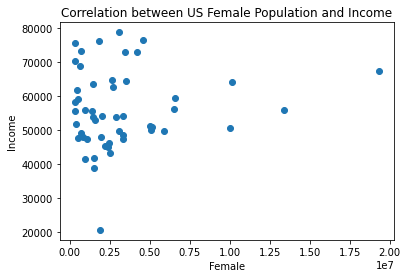

In [5]:
#Plot a scatterplot to see the relationship between income and % of US female population

plt.scatter(us_census.Female, us_census.Income)
plt.xlabel('Female')
plt.ylabel('Income')
plt.title('Correlation between US Female Population and Income')
plt.show()


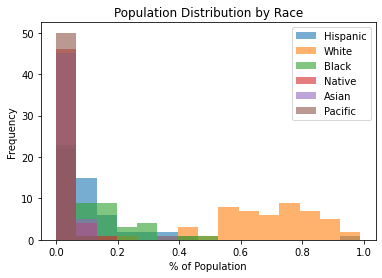

In [6]:
#Plot a histogram to see US population distribution by race

race_list = us_census[['Hispanic','White','Black','Native','Asian','Pacific']]
race_list.plot.hist(alpha=.6,bins=15)
plt.xlabel('% of Population')
plt.title('Population Distribution by Race')
plt.show()


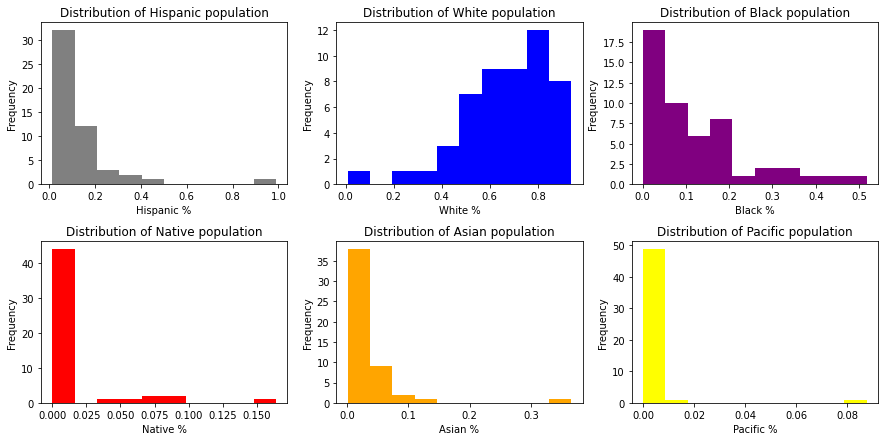

In [7]:
#Plot individual histograms to see US population distribution by race

race_list = us_census[['Hispanic','White','Black','Native','Asian','Pacific']]

plt.figure(figsize =(15,7))
plt.subplots_adjust(hspace = .35)
colors = ['grey', 'blue', 'purple', 'red', 'orange', 'yellow']
x = 1

for race in race_list:
    plt.subplot(2,3,x)
    plt.hist(us_census[race], color = colors[x-1])
    plt.xlabel('{} %'.format(race))
    plt.ylabel('Frequency')
    plt.title('Distribution of {} population'.format(race))
    x+=1
plt.show()